In [27]:
import cvxpy as cvx
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.sparse as spsp

In [41]:
n = 100
G = nx.random_regular_graph(3, n)
# G = nx.random_geometric_graph(n, 0.2)
A = nx.adjacency_matrix(G)

In [42]:
L = spsp.spdiags(np.array(A.sum(axis=1)).ravel(), 0, n, n, format="csr") - A

/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


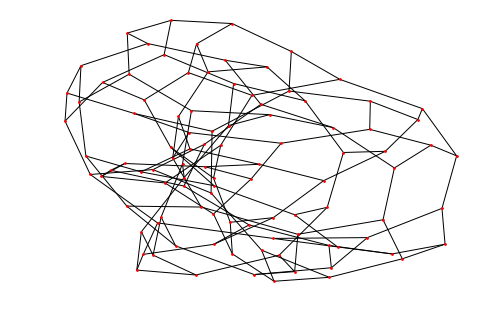

In [43]:
nx.draw(G, node_size=3)

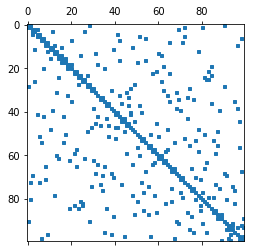

In [44]:
plt.spy(L, markersize=3)

In [45]:
def cut(x, L):
    return 0.25 * x @ L @ x

In [46]:
# Generate random cut
cut_trial = 2 * np.random.randint(0, 2, n) - 1
print(cut_trial)
cut(cut_trial, L)

[-1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1
  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1
  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1
 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1
  1  1  1 -1]


75.0

/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


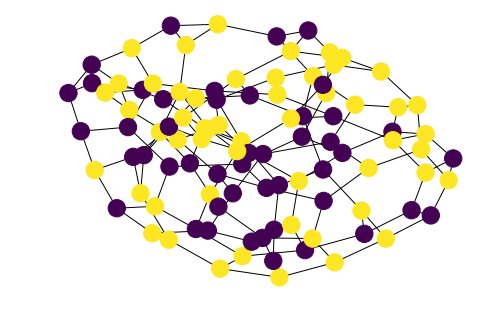

In [47]:
nx.draw(G, node_color=cut_trial)

$$
\max \frac14 x^{\top}Lx \quad \text{s.t. }x_i^2 = 1
$$

$$
\max \frac14 trace(Lxx^{\top}) \quad \text{s.t. }x_i^2 = 1
$$

$$ X = xx^{\top}$$

$$ \max_{X \succeq 0} \frac14 trace(LX) \quad \text{s.t. } \mathrm{diag}(X) = 1 $$

## Create SDP relaxation

In [49]:
X = cvx.Variable((n, n), PSD=True)
obj = 0.25 * cvx.trace(L.toarray() * X)
constr = [cvx.diag(X) == 1]
problem = cvx.Problem(cvx.Maximize(obj), constraints=constr)
problem.solve(verbose=True, solver=cvx.SCS, eps=1e-7, max_iters=5000)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 5150, CG tol ~ 1/iter^(2.00)
eps = 1.00e-07, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
Variables n = 5050, constraints m = 5150
Cones:	primal zero / dual free vars: 100
	sd vars: 5050, sd blks: 1
Setup time: 1.94e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf      -inf       inf  3.69e-03 
   100| 6.17e-03  7.47e-03  6.21e-04 -1.41e+02 -1.41e+02  5.27e-15  3.29e-01 
   200| 2.43e-03  2.85e-03  1.16e-04 -1.42e+02 -1.42e+02  5.88e-15  6.49e-01 
   300| 1.68e-0

142.65827961698182

In [51]:
X.value

array([[ 0.99999997, -0.97970742, -0.71604451, ...,  0.26504328,
         0.23111706, -0.02514058],
       [-0.97970742,  0.99999998,  0.81952039, ..., -0.44746818,
        -0.33165732,  0.22288463],
       [-0.71604451,  0.81952039,  0.99999998, ..., -0.65608623,
        -0.16740859,  0.54603131],
       ...,
       [ 0.26504328, -0.44746818, -0.65608623, ...,  0.99999998,
         0.73962072, -0.9664415 ],
       [ 0.23111706, -0.33165732, -0.16740859, ...,  0.73962072,
         0.99999997, -0.64378248],
       [-0.02514058,  0.22288463,  0.54603131, ..., -0.9664415 ,
        -0.64378248,  0.99999998]])

In [68]:
u, s, v = np.linalg.svd(X.value)

In [70]:
np.linalg.norm(X.value - u @ np.diagflat(s) @ v)

5.2127306547445506e-14

In [53]:
s

array([4.36471739e+01, 3.60915340e+01, 2.02612877e+01, 6.24598048e-08,
       6.10431288e-08, 5.97082041e-08, 5.86349423e-08, 5.67294241e-08,
       5.57709564e-08, 5.55278039e-08, 5.48987519e-08, 5.38491112e-08,
       5.31306258e-08, 5.24582431e-08, 5.15441677e-08, 5.02418842e-08,
       4.90292428e-08, 4.82946547e-08, 4.77264753e-08, 4.75162108e-08,
       4.73655288e-08, 4.67863412e-08, 4.57571538e-08, 4.50184659e-08,
       4.39559996e-08, 4.37507527e-08, 4.34643639e-08, 4.22362735e-08,
       4.09986732e-08, 4.06490117e-08, 3.96166982e-08, 3.94004330e-08,
       3.90924071e-08, 3.75070472e-08, 3.71760227e-08, 3.63017412e-08,
       3.61705996e-08, 3.54239046e-08, 3.40881588e-08, 3.36492258e-08,
       3.33720268e-08, 3.30663505e-08, 3.27792503e-08, 3.19201534e-08,
       3.11178489e-08, 3.04267721e-08, 2.99064990e-08, 2.95628036e-08,
       2.81426296e-08, 2.72614008e-08, 2.70570437e-08, 2.58889106e-08,
       2.53040796e-08, 2.49586303e-08, 2.47188540e-08, 2.42509151e-08,
      

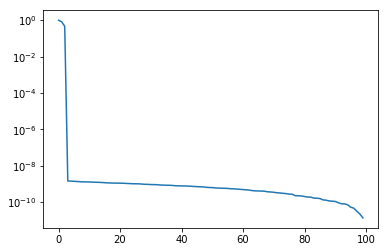

In [54]:
plt.semilogy(s / s[0])

In [63]:
np.linalg.matrix_rank(X.value, tol=1e-8)

77

In [71]:
U = (v.T * np.sqrt(s)).T
print(np.linalg.norm(X.value - U.T @ U))

6.762454536972834e-08


In [72]:
num_trials = 100000
average_gw_cut = np.zeros(num_trials)
for i in range(num_trials):
    r = np.random.randn(n)
    average_gw_cut[i] = cut(np.sign(U.T @ (r / np.linalg.norm(r))), L)

/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


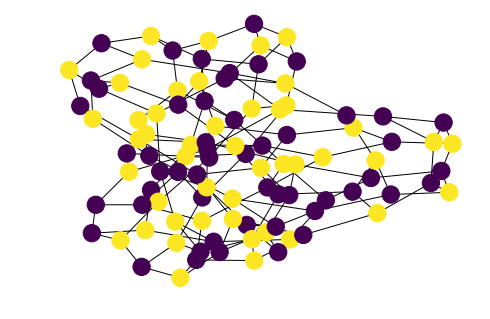

In [73]:
gw_cut = np.sign(U.T @ (r / np.linalg.norm(r)))
nx.draw(G, node_color=gw_cut)

In [74]:
print(np.mean(average_gw_cut), np.std(average_gw_cut), np.max(average_gw_cut))

131.47752 2.285763471927925 136.0


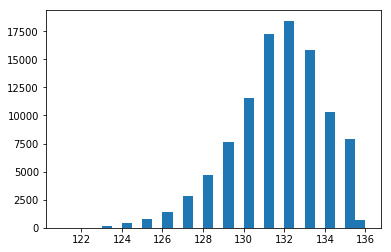

In [77]:
_ = plt.hist(average_gw_cut, bins=30)

In [78]:
# Check theory
print(problem.value)
print(0.8785 * problem.value)
print(np.mean(average_gw_cut))
print(np.max(average_gw_cut))
print(1.1382 * np.max(average_gw_cut))

142.65827961698182
125.32529864351852
131.47752
136.0
154.79520000000002


In [79]:
average_random_cut = np.zeros(num_trials)
for i in range(num_trials):
    cut_trial = 2 * np.random.randint(0, 2, n) - 1
    average_random_cut[i] = cut(cut_trial, L)

In [80]:
print(np.mean(average_random_cut), np.std(average_random_cut), np.max(average_random_cut))

75.00052 6.1142096569875655 101.0


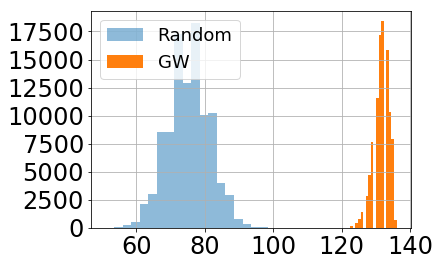

In [81]:
_ = plt.hist(average_random_cut, bins=20, label="Random", alpha=0.5)
_ = plt.hist(average_gw_cut, bins=20, label="GW", alpha=1)
plt.legend(fontsize=18)
plt.tight_layout(rect=(0.1, 0.1, 1, 1))
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(True)